# Wczytanie danych

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,confusion_matrix
from sklearn.metrics import classification_report,roc_curve
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import preprocessing
import matplotlib.pyplot as plt
import torch
from matplotlib.pyplot import rcParams
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from numpy.random import seed
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop,Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
filename = 'samolot.xlsx'
search_path = '/content/drive/My Drive'
# Search for the file
file_path = None
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file_path = os.path.join(root, filename)
        break
    df = pd.read_excel(file_path)

Mounted at /content/drive


In [ ]:
data2 = pd.read_excel('/content/drive/MyDrive/samolot.xlsx',sheet_name = 'normalizowane')

In [ ]:
data2.head()

Unnamed: 0  Gender  Customer Type       Age  Type of Travel  Class  \
0         NaN       1              1  0.076923               1    1.0   
1         NaN       1              0  0.230769               0    0.0   
2         NaN       0              1  0.243590               0    0.0   
3         NaN       0              1  0.230769               0    0.0   
4         NaN       1              1  0.692308               0    0.0   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0         0.086632                    0.6                                0.8   
1         0.041195                    0.6                                0.4   
2         0.224354                    0.4                                0.4   
3         0.107229                    0.4                                1.0   
4         0.036955                    0.6                                0.6   

   Ease of Online booking  ...  Inflight entertainment  On-board service  \
0                     0.6  ...                     1.0               0.8   
1                     0.6  ...                     0.2               0.2   
2                     0.4  ...                     1.0               0.8   
3                     1.0  ...                     0.4               0.4   
4                     0.6  ...                     0.6               0.6   

   Leg room service  Baggage handling  Checkin service  Inflight service  \
0               0.6              0.75              0.8               1.0   
1               1.0              0.50              0.2               0.8   
2               0.6              0.75              0.8               0.8   
3               1.0              0.50              0.2               0.8   
4               0.8              0.75              0.6               0.6   

   Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
0          1.0                    0.015704                  0.011364   
1          0.2                    0.000628                  0.003788   
2          1.0                    0.000000                  0.000000   
3          0.4                    0.006910                  0.005682   
4          0.6                    0.000000                  0.000000   

   satisfaction  
0             0  
1             0  
2             1  
3             0  
4             1  

[5 rows x 24 columns]

# Stworzenie zbioru

In [ ]:
data = data2.copy()

In [ ]:
data.head()

Unnamed: 0  Gender  Customer Type       Age  Type of Travel  Class  \
0         NaN       1              1  0.076923               1    1.0   
1         NaN       1              0  0.230769               0    0.0   
2         NaN       0              1  0.243590               0    0.0   
3         NaN       0              1  0.230769               0    0.0   
4         NaN       1              1  0.692308               0    0.0   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0         0.086632                    0.6                                0.8   
1         0.041195                    0.6                                0.4   
2         0.224354                    0.4                                0.4   
3         0.107229                    0.4                                1.0   
4         0.036955                    0.6                                0.6   

   Ease of Online booking  ...  Inflight entertainment  On-board service  \
0                     0.6  ...                     1.0               0.8   
1                     0.6  ...                     0.2               0.2   
2                     0.4  ...                     1.0               0.8   
3                     1.0  ...                     0.4               0.4   
4                     0.6  ...                     0.6               0.6   

   Leg room service  Baggage handling  Checkin service  Inflight service  \
0               0.6              0.75              0.8               1.0   
1               1.0              0.50              0.2               0.8   
2               0.6              0.75              0.8               0.8   
3               1.0              0.50              0.2               0.8   
4               0.8              0.75              0.6               0.6   

   Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
0          1.0                    0.015704                  0.011364   
1          0.2                    0.000628                  0.003788   
2          1.0                    0.000000                  0.000000   
3          0.4                    0.006910                  0.005682   
4          0.6                    0.000000                  0.000000   

   satisfaction  
0             0  
1             0  
2             1  
3             0  
4             1  

[5 rows x 24 columns]

In [ ]:
del data['Unnamed: 0']

In [ ]:
data.isnull().any().any()

False

In [ ]:
data.describe()

Gender  Customer Type            Age  Type of Travel  \
count  100055.000000  100055.000000  100055.000000   100055.000000   
mean        0.492799       0.817161       0.415097        0.310339   
std         0.499951       0.386537       0.193736        0.462635   
min         0.000000       0.000000       0.000000        0.000000   
25%         0.000000       1.000000       0.256410        0.000000   
50%         0.000000       1.000000       0.423077        0.000000   
75%         1.000000       1.000000       0.564103        1.000000   
max         1.000000       1.000000       1.000000        1.000000   

               Class  Flight Distance  Inflight wifi service  \
count  100055.000000    100055.000000          100055.000000   
mean        0.296977         0.234155               0.545722   
std         0.310281         0.201381               0.265471   
min         0.000000         0.000000               0.000000   
25%         0.000000         0.077342               0.400000   
50%         0.500000         0.164176               0.600000   
75%         0.500000         0.345921               0.800000   
max         1.000000         1.000000               1.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                      100055.000000           100055.000000   
mean                            0.611827                0.551161   
std                             0.305049                0.279613   
min                             0.000000                0.000000   
25%                             0.400000                0.400000   
50%                             0.600000                0.600000   
75%                             0.800000                0.800000   
max                             1.000000                1.000000   

       Gate location  ...  Inflight entertainment  On-board service  \
count  100055.000000  ...           100055.000000     100055.000000   
mean        0.595095  ...                0.671601          0.676462   
std         0.255379  ...                0.266672          0.257732   
min         0.000000  ...                0.000000          0.000000   
25%         0.400000  ...                0.400000          0.400000   
50%         0.600000  ...                0.800000          0.800000   
75%         0.800000  ...                0.800000          0.800000   
max         1.000000  ...                1.000000          1.000000   

       Leg room service  Baggage handling  Checkin service  Inflight service  \
count     100055.000000     100055.000000    100055.000000     100055.000000   
mean           0.670109          0.657991         0.660751          0.728024   
std            0.263104          0.295197         0.253039          0.235162   
min            0.000000          0.000000         0.000000          0.000000   
25%            0.400000          0.500000         0.600000          0.600000   
50%            0.800000          0.750000         0.600000          0.800000   
75%            0.800000          1.000000         0.800000          1.000000   
max            1.000000          1.000000         1.000000          1.000000   

         Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  \
count  100055.000000               100055.000000             100055.000000   
mean        0.657432                    0.009311                  0.009559   
std         0.262429                    0.023998                  0.024387   
min         0.000000                    0.000000                  0.000000   
25%         0.400000                    0.000000                  0.000000   
50%         0.600000                    0.000000                  0.000000   
75%         0.800000                    0.007538                  0.008207   
max         1.000000                    1.000000                  1.000000   

        satisfaction  
count  100055.000000  
mean        0.433292  
std         0.495532  
min         0.000000  
25%         0.

In [ ]:
#podzial zbioru na treningowe i testowe
X = data.iloc[:,2:-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Wykresy

<Axes: xlabel='Gender', ylabel='count'>

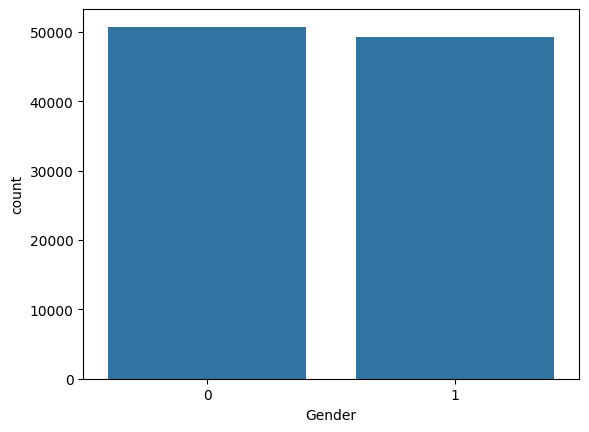

In [ ]:
#plec nie ma wiekszego znaczenia
sns.countplot(data=data,x='Gender')

In [ ]:
data.groupby(['satisfaction'])['satisfaction'].count()/10000 * 10

satisfaction
0    56.702
1    43.353
Name: satisfaction, dtype: float64

Text(0.5, 1.0, 'Satisfaction Percent')

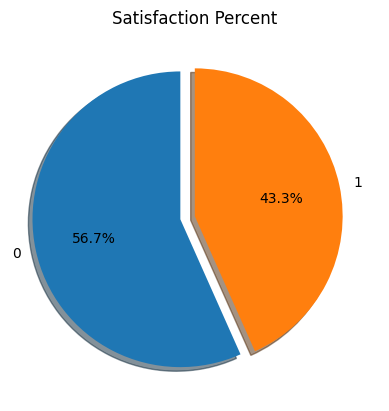

In [ ]:
#podzial satysfakcji tez jest w miare rowny
fig, axes = plt.subplots(nrows=1, ncols=1)
axes.pie(data['satisfaction'].value_counts(), labels=data['satisfaction'].value_counts().index, autopct='%1.1f%%', startangle=90, explode=[0.1, 0], shadow=True)
axes.set_title('Satisfaction Percent')

<Axes: xlabel='Age', ylabel='Count'>

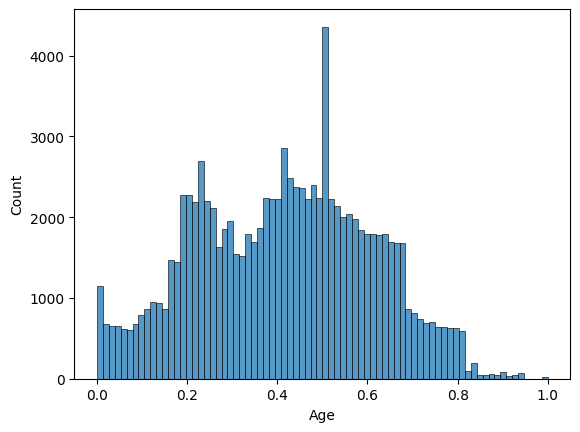

In [ ]:
#podzial wiekowy w tym zbiorze
sns.histplot(data=data,x='Age')

In [ ]:
data.groupby(pd.cut(data['Flight Distance'],[0,0.25,0.5,0.75,1]))['satisfaction'].sum()/data.groupby(pd.cut(data['Flight Distance'],[0,0.25,0.5,0.75,1]))['satisfaction'].count()*100
#bardziej zadowolone osoby byly ktore lataly dluzej

Flight Distance
(0.0, 0.25]    32.915379
(0.25, 0.5]    57.120200
(0.5, 0.75]    73.057463
(0.75, 1.0]    76.919476
Name: satisfaction, dtype: float64

<Axes: xlabel='satisfaction'>

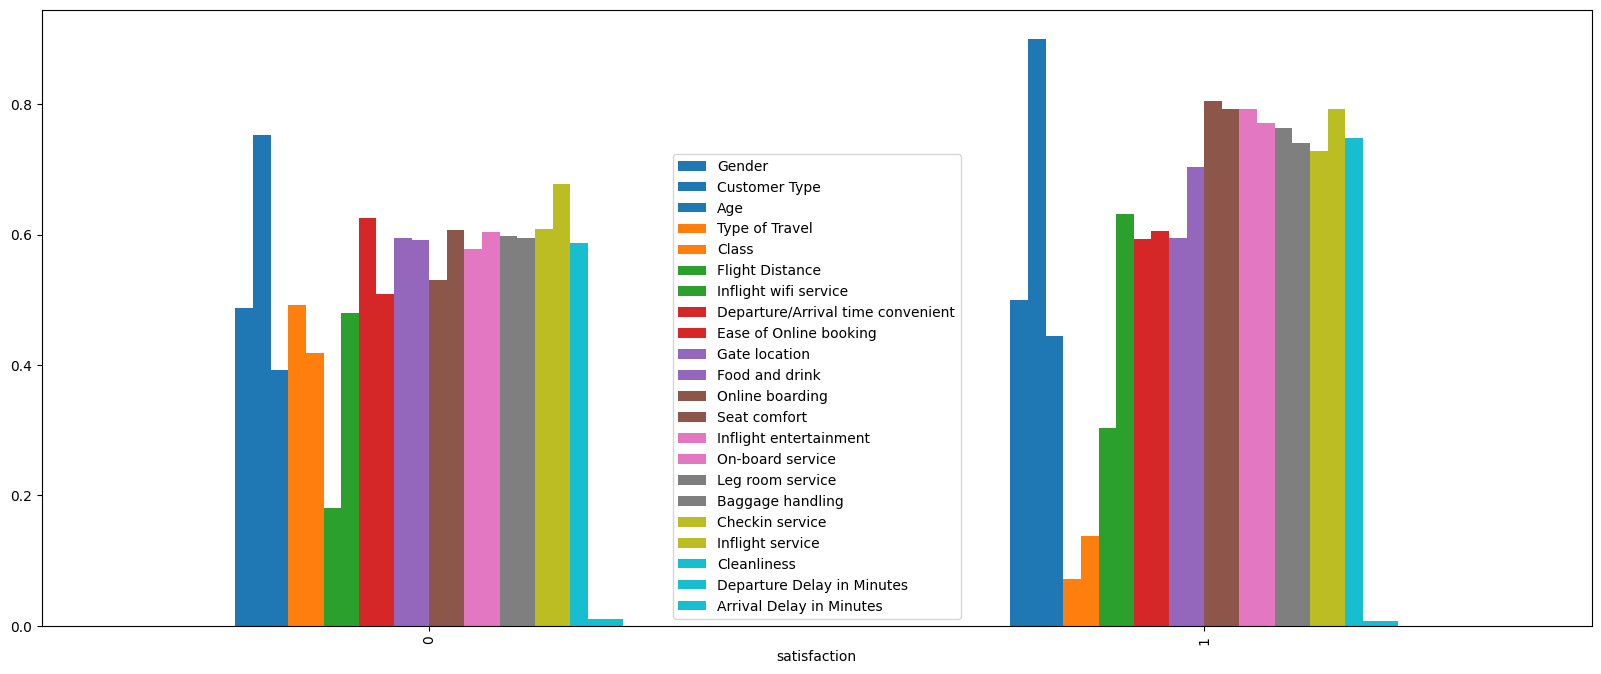

In [ ]:
#najwieksze roznice w zadowoleniu widac na kolumnach (online boarding,seat comfort,
#inflight entertainment,on-board service ( rozowe i brazowe))
data.groupby("satisfaction").mean().plot.bar(cmap="tab10",figsize=(20,8))

<Axes: xlabel='Type of Travel', ylabel='count'>

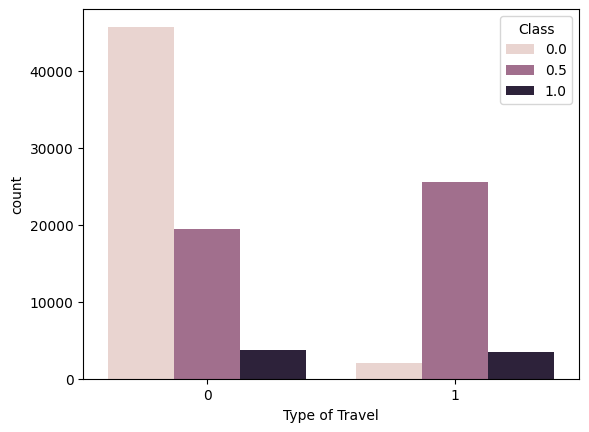

In [ ]:
#rodzaje lotow i satysfakcje
sns.countplot(data=data,x='Type of Travel',hue="Class")

<Axes: xlabel='Cleanliness', ylabel='Density'>

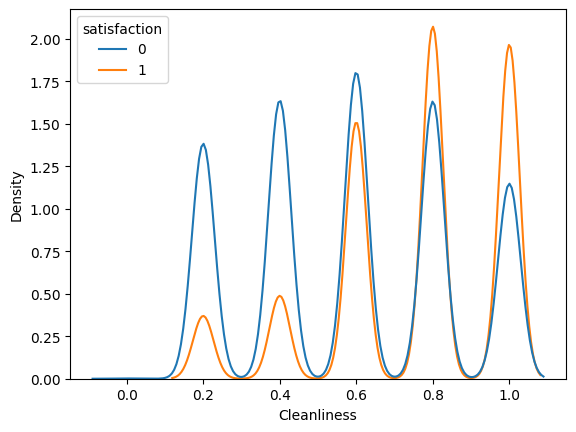

In [ ]:
#loty personalne sa te ktore pokazuja wiecej niezadowolenia
#wykres czystosci i zadowolenia
sns.kdeplot(data=data,x='Cleanliness',hue="satisfaction")

<ipython-input-42-6c50cbd6d88e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Service', y='Average Satisfaction Rating', data=average_ratings_df, palette='viridis')


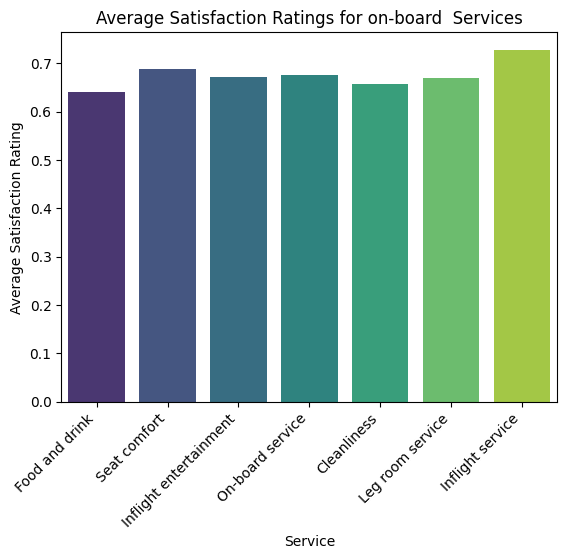

<ipython-input-42-6c50cbd6d88e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Service', y='Average Satisfaction Rating', data=average_ratings_df2, palette='viridis')


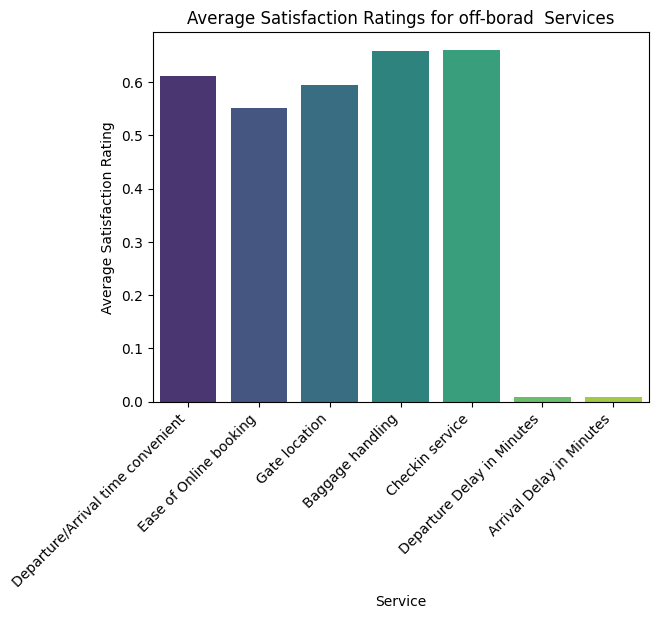

In [ ]:
on_board_services = ['Food and drink', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Cleanliness','Leg room service','Inflight service']
average_ratings = data[on_board_services].mean()
average_ratings_df = pd.DataFrame({'Service': average_ratings.index, 'Average Satisfaction Rating': average_ratings.values})
sns.barplot(x='Service', y='Average Satisfaction Rating', data=average_ratings_df, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Average Satisfaction Ratings for on-board  Services')
plt.show()


off_board_services = ['Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Baggage handling', 'Checkin service','Departure Delay in Minutes','Arrival Delay in Minutes']
average_ratings2 = data[off_board_services].mean()
average_ratings_df2 = pd.DataFrame({'Service': average_ratings2.index, 'Average Satisfaction Rating': average_ratings2.values})
sns.barplot(x='Service', y='Average Satisfaction Rating', data=average_ratings_df2, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Average Satisfaction Ratings for off-borad  Services')
plt.show()

<Axes: xlabel='Baggage handling', ylabel='Density'>

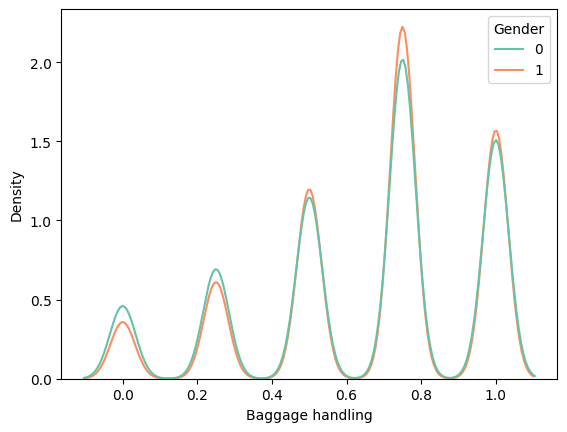

In [ ]:
sns.kdeplot(data=data,x='Baggage handling',hue= 'Gender',palette='Set2')
#pokazuje, że mężczyźni są bardziej zadowoleni z obsługi bagażu niż kobiety

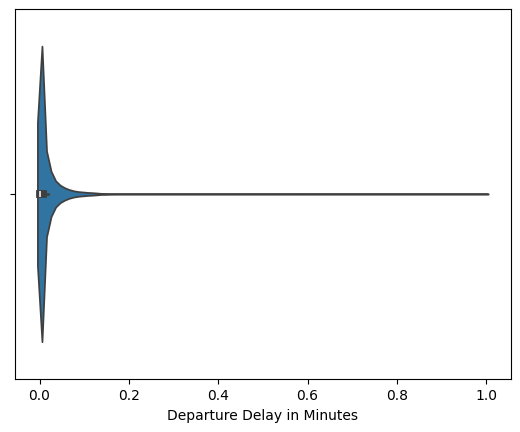

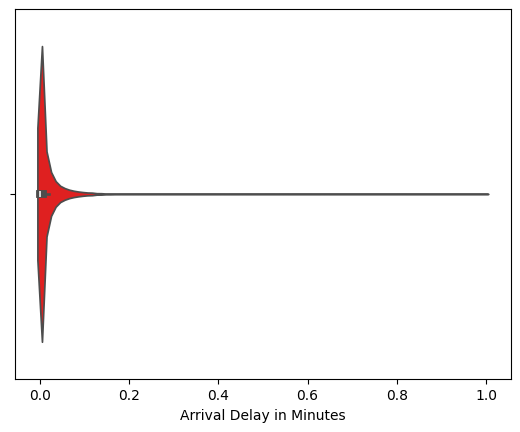

In [ ]:
sns.violinplot(data=data,x='Departure Delay in Minutes')
plt.show()
sns.violinplot(data=data,x='Arrival Delay in Minutes',color='r')
plt.show()
#Loty są w większości przypadków punktualne, z wyjątkiem kilku sytuacji

<Axes: xlabel='Customer Type', ylabel='count'>

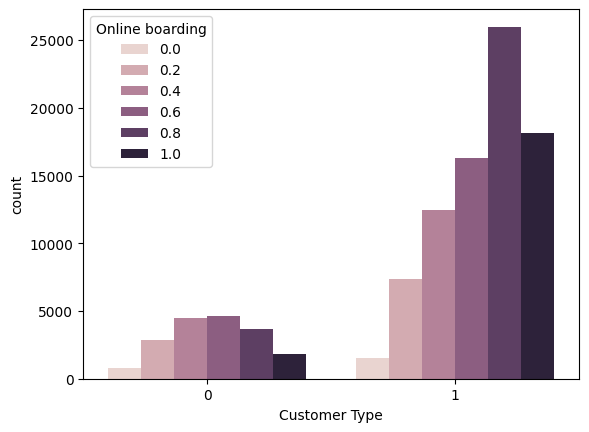

In [ ]:
sns.countplot(data,x='Customer Type',hue="Online boarding")
#lojalnym klientom bardziej odpowiadaja uslugi online

# tsne

In [ ]:
tsne = TSNE(n_components=2,perplexity=40, random_state=42)
X_reduced_tsne = tsne.fit_transform(data)
plt.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1],c=vectorizer(y))

NameError: name 'vectorizer' is not defined

# Korelacja i PCA

In [ ]:
data.corr()

Gender  Customer Type       Age  \
Gender                             1.000000       0.031872  0.007742   
Customer Type                      0.031872       1.000000  0.282006   
Age                                0.007742       0.282006  1.000000   
Type of Travel                     0.006443       0.308478 -0.047773   
Class                             -0.012630      -0.042134 -0.117113   
Flight Distance                    0.006077       0.225173  0.099014   
Inflight wifi service              0.009390       0.007406  0.017083   
Departure/Arrival time convenient  0.008416       0.206819  0.037921   
Ease of Online booking             0.006414       0.019303  0.024282   
Gate location                      0.000365      -0.006615 -0.001890   
Food and drink                     0.005342       0.060254  0.023370   
Online boarding                   -0.042647       0.189566  0.208775   
Seat comfort                      -0.026431       0.159841  0.160549   
Inflight entertainment             0.006491       0.110581  0.076445   
On-board service                   0.007531       0.057064  0.057004   
Leg room service                   0.032043       0.048094  0.040634   
Baggage handling                   0.037972      -0.025092 -0.048002   
Checkin service                    0.010158       0.032410  0.036341   
Inflight service                   0.040341      -0.022599 -0.049639   
Cleanliness                        0.006276       0.084328  0.053806   
Departure Delay in Minutes         0.003432      -0.004266 -0.010077   
Arrival Delay in Minutes           0.001196      -0.004798 -0.012055   
satisfaction                       0.013462       0.187515  0.136220   

                                   Type of Travel     Class  Flight Distance  \
Gender                                   0.006443 -0.012630         0.006077   
Customer Type                            0.308478 -0.042134         0.225173   
Age                                     -0.047773 -0.117113         0.099014   
Type of Travel                           1.000000  0.487492        -0.267498   
Class                                    0.487492  1.000000        -0.427552   
Flight Distance                         -0.267498 -0.427552         1.000000   
Inflight wifi service                   -0.105288 -0.023258         0.007043   
Departure/Arrival time convenient        0.260884  0.090046        -0.020354   
Ease of Online booking                  -0.133208 -0.094625         0.065696   
Gate location                           -0.030495 -0.004471         0.004553   
Food and drink                          -0.063325 -0.076770         0.057499   
Online boarding                         -0.224416 -0.297082         0.215239   
Seat comfort                            -0.124321 -0.209450         0.157654   
Inflight entertainment                  -0.147885 -0.178811         0.128498   
On-board service                        -0.055391 -0.208854         0.108966   
Leg room service                        -0.138387 -0.197652         0.132397   
Baggage handling                        -0.030995 -0.163968         0.062614   
Checkin service                          0.016822 -0.156710         0.072972   
Inflight service                        -0.022403 -0.158932         0.057135   
Cleanliness                             -0.078859 -0.125683         0.093262   
Departure Delay in Minutes              -0.006441  0.009695         0.002942   
Arrival Delay in Minutes                -0.006668  0.014172        -0.001541   
satisfaction                            -0.449402 -0.449782         0.299015   

                                   Inflight wifi service  \
Gender                                          0.009390   
Customer Type                                   0.007406   
Age                                             0.017083   
Type of Travel                                 -0.105288   
Class                                          -0.023258   
Flight Distance            

In [ ]:
df_kor = data[['Departure Delay in Minutes', 'Arrival Delay in Minutes']].copy()
#robienie PCA
pca = PCA(n_components = 1)
df_2d = pca.fit_transform(
    df_kor
)
df_2d_df = pd.DataFrame(df_2d,columns = ["pca_0"])
df_2d_df
#zmniejszenie wymiaru dzieki temu ze kolumny 'Departure Delay in Minutes', 'Arrival Delay in Minutes' maja
#korelacje 0.96 wiec wystarczy jedna

pca_0
0       0.005769
1      -0.010203
2      -0.013344
3      -0.004448
4      -0.013344
...          ...
100050 -0.009772
100051 -0.013344
100052 -0.013344
100053 -0.013344
100054 -0.013344

[100055 rows x 1 columns]

In [ ]:
print(len(data),len(df_2d_df))
#czy wymiar sie zgadza

100055 100055


In [ ]:
#podmienienie tych 2 kolumn na kolumne pca
#data.drop('Departure Delay in Minutes', axis = 1 ,inplace = True)
data.drop('Arrival Delay in Minutes', axis = 1 ,inplace = True)
data.drop('Departure Delay in Minutes', axis = 1 ,inplace = True)

In [ ]:
lista = df_2d_df['pca_0'].values
PCA_scaler = preprocessing.MinMaxScaler()
PCA_scaled = PCA_scaler.fit_transform(lista.reshape(-1,1))
#znormalizowanie tego PCA

In [ ]:
data.insert(21,'Arrival',PCA_scaled)
#usuwam 2 zmienne i zastepuje je pca

<Axes: >

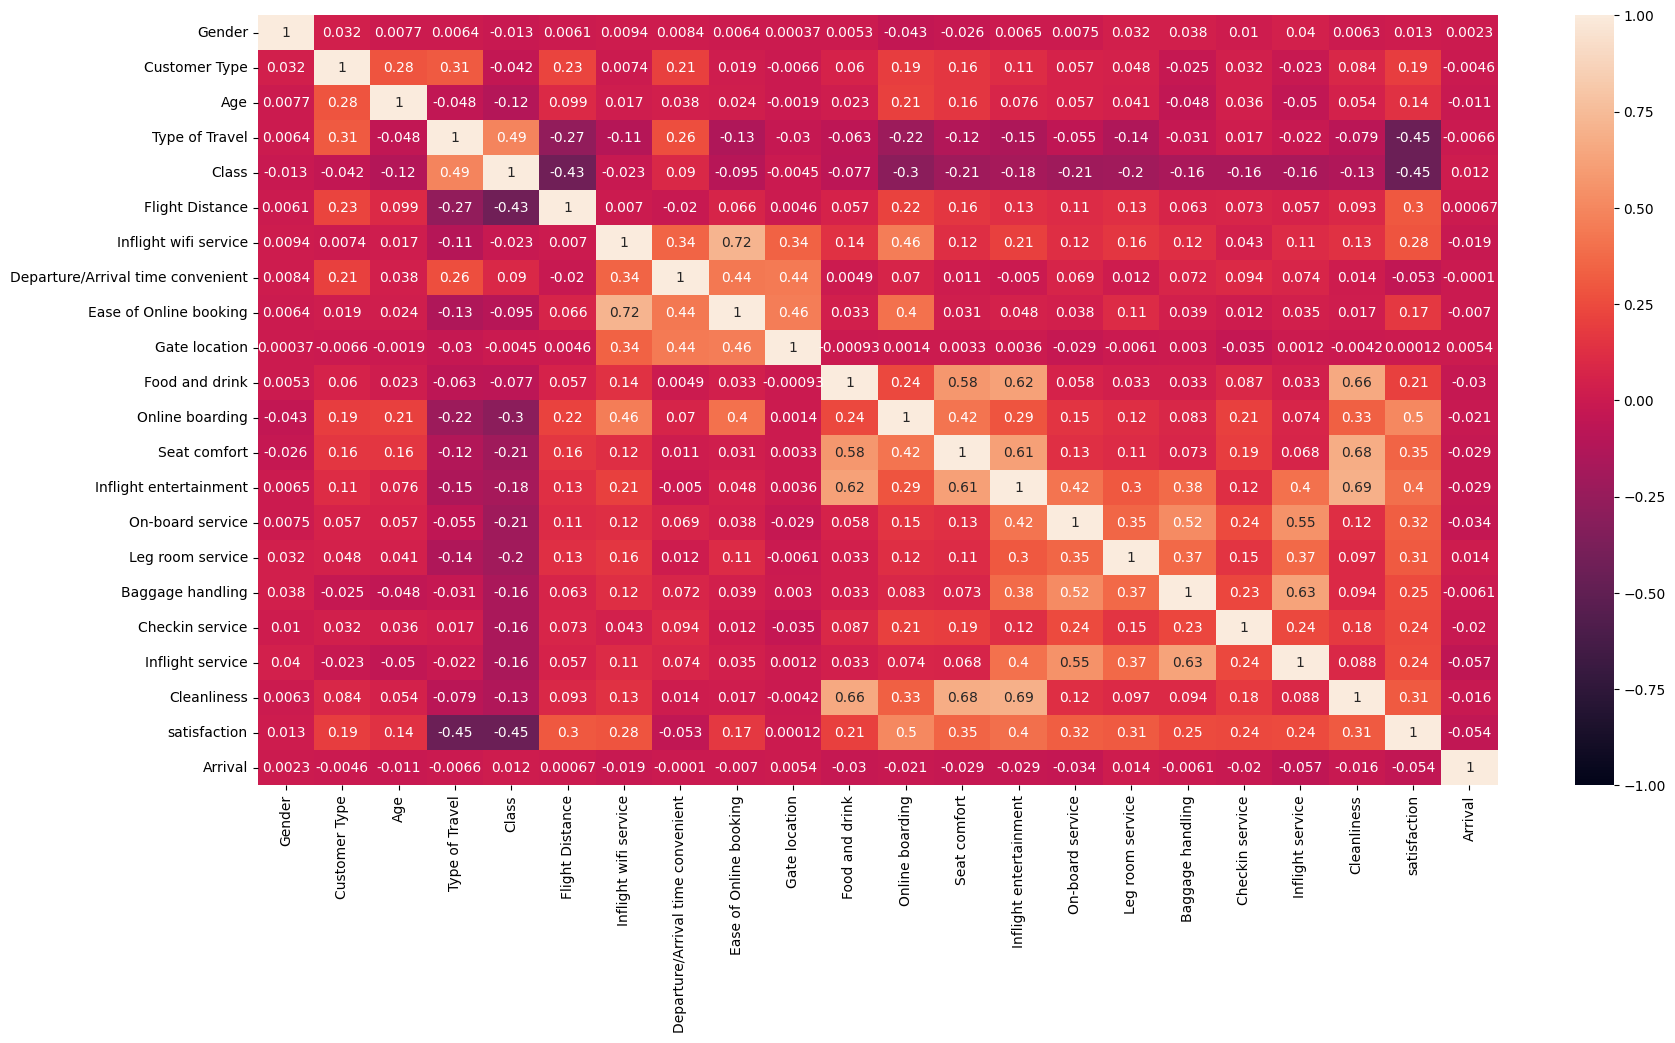

In [ ]:
korelacje = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),vmin=-1,vmax=1,annot=True)

In [ ]:
pca_3 = PCA(n_components=3)
pca_3.fit(X)
transformed_df = pca_3.transform(X)

In [ ]:
fig = go.Figure(data=[go.Scatter3d(
    x=transformed_df[:, 0],
    y=transformed_df[:, 1],
    z=transformed_df[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=colors,  # Kolory na satisfaction
        colorscale='Viridis',          # Skala kolorów
        opacity=0.8
    )
)])

# Dodaj etykiety osi
fig.update_layout(scene=dict(
    xaxis_title='PCA 1',
    yaxis_title='PCA 2',
    zaxis_title='PCA 3'
))

# Wyświetl wykres interaktywny
fig.show()

# Regresja logistyczna

In [ ]:
#regresja logistyczna nie stosujac PCA
model = LogisticRegression(max_iter = 10000)
model.fit(X_train,y_train)
#przetestowanie na zbiorze testowym
y_predicted = model.predict(X_test)
MSE = mean_squared_error(y_test,y_predicted)
MSE
#MSE oznacza sredni blad

0.1425240013325661

In [ ]:
#wyniki modelu
val = cross_val_score(model,X_test,y_test,cv=3)
classification_report(y_test,y_predicted)

'              precision    recall  f1-score   support\n\n           0       0.86      0.89      0.87     18525\n           1       0.85      0.82      0.84     14494\n\n    accuracy                           0.86     33019\n   macro avg       0.86      0.85      0.85     33019\nweighted avg       0.86      0.86      0.86     33019\n'

In [ ]:
#Macierz pomylek i nasze accuracy
matrix = confusion_matrix(y_test,y_predicted)
(matrix[1][1] + matrix[0][0]) / (matrix[0][0] + matrix[0][1] + matrix[1][0] + matrix[1][1]) * 100

85.74759986674339

In [ ]:
confusion_matrix(y_test,y_predicted)

array([[16395,  2130],
       [ 2576, 11918]])

In [ ]:
#stworzenie selektora do zostawienia okreslonych kolumn
selector = RFECV(model,step = 1, min_features_to_select = 1, cv = 10,scoring = "f1")
selector.fit(X_train,y_train)

RFECV(cv=10, estimator=LogisticRegression(max_iter=10000), scoring='f1')

In [ ]:
#zostawiamy tylko te kolumny ktore maja wartosc true
kolumny_t = pd.DataFrame({
    "selected": selector.support_,
    "ranking": selector.ranking_
}, index=X.columns)
data_t = kolumny_t[
    kolumny_t['selected'] == True
].index
X_t = X[data_t.tolist()]

In [ ]:
kolumny_t
#zmniejsza sie nam wymiar o 4

selected  ranking
Age                                    True        1
Type of Travel                         True        1
Class                                  True        1
Flight Distance                        True        1
Inflight wifi service                  True        1
Departure/Arrival time convenient     False        4
Ease of Online booking                 True        1
Gate location                         False        5
Food and drink                         True        1
Online boarding                        True        1
Seat comfort                           True        1
Inflight entertainment                 True        1
On-board service                       True        1
Leg room service                       True        1
Baggage handling                      False        2
Checkin service                        True        1
Inflight service                      False        3
Cleanliness                            True        1
Departure Delay in Minutes             True        1
Arrival Delay in Minutes               True        1

In [ ]:
wartosci = y_test.value_counts()
null_accuracy = wartosci[1] / (wartosci[1] + wartosci[0])
null_accuracy
#null accuracy pokazuje skutecznosc losowego losowania etykiety
#biorac pod uwage ze nasz zbior testowy ma nie rowne rozlozenie wartosci etykiet

0.4389593870195948

In [ ]:
X_t_train, X_t_test, y_train, y_test = train_test_split(X_t, y, test_size=0.33, random_state=42)

In [ ]:
#stworzenie nowej regresji logistycznej dla zbioru z 4 cechami
model_t = LogisticRegression(max_iter = 10000)
model_t.fit(X_t_train,y_train)
#przetestowanie na zbiorze testowym
y_t_predicted = model_t.predict(X_t_test)
MSE = mean_squared_error(y_test,y_t_predicted)
MSE
#bardzo mala roznica ale znacznie zmniejszylismy liczbe zmiennychy

0.1417971470971259

In [ ]:
#wyniki modelu
val = cross_val_score(model,X_t_test,y_test,cv=3)
classification_report(y_test,y_t_predicted)

'              precision    recall  f1-score   support\n\n           0       0.86      0.89      0.88     18525\n           1       0.85      0.82      0.84     14494\n\n    accuracy                           0.86     33019\n   macro avg       0.86      0.85      0.86     33019\nweighted avg       0.86      0.86      0.86     33019\n'

In [ ]:
#Macierz pomylek i nasze accuracy
matrix = confusion_matrix(y_test,y_t_predicted)
(matrix[1][1] + matrix[0][0]) / (matrix[0][0] + matrix[0][1] + matrix[1][0] + matrix[1][1]) * 100
#tez maly zysk ale zmniejszyla sie znacznie roznica kolumn

85.82028529028742

# KNN

In [ ]:
#Zrobienie knn dla wartosci od 2 do 10
for i in range(2,10):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  print(f'wartosci dla n = {i}')
  print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

  print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))
# mozemy zaobserwowac najlepsze wyniki nieznacznie lecz dla n = 9 dlatego taki parametr
# wybiore dla modelu knn

wartosci dla n = 2
Training set score: 0.9514
Test set score: 0.9116
wartosci dla n = 3
Training set score: 0.9586
Test set score: 0.9249
wartosci dla n = 4
Training set score: 0.9437
Test set score: 0.9208
wartosci dla n = 5
Training set score: 0.9478
Test set score: 0.9266
wartosci dla n = 6
Training set score: 0.9397
Test set score: 0.9234
wartosci dla n = 7
Training set score: 0.9434
Test set score: 0.9266
wartosci dla n = 8
Training set score: 0.9383
Test set score: 0.9240
wartosci dla n = 9
Training set score: 0.9408
Test set score: 0.9268


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.9408
Test set score: 0.9268


In [ ]:
#Macierz pomylek i nasze accuracy
#duzo lepszy wynik niz w przypadku regresji
matrix = confusion_matrix(y_test,y_pred)
(matrix[1][1] + matrix[0][0]) / (matrix[0][0] + matrix[0][1] + matrix[1][0] + matrix[1][1]) * 100

92.67997213725431

# SVM

In [ ]:
#SVM kernel = rbf
param_grid = {'C': [0.1, 1],
              'gamma': [1, 0.1],
              'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv = 2)
grid.fit(X_train, y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.928 total time=  52.0s
[CV 2/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.928 total time=  43.0s
[CV 1/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.891 total time= 1.2min
[CV 2/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.890 total time=  57.8s
[CV 1/2] END ..........C=1, gamma=1, kernel=rbf;, score=0.947 total time=  34.0s
[CV 2/2] END ..........C=1, gamma=1, kernel=rbf;, score=0.948 total time=  36.7s
[CV 1/2] END ........C=1, gamma=0.1, kernel=rbf;, score=0.920 total time=  43.3s
[CV 2/2] END ........C=1, gamma=0.1, kernel=rbf;, score=0.918 total time=  45.5s


GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1], 'gamma': [1, 0.1], 'kernel': ['rbf']},
             verbose=3)

In [ ]:
grid.score(X_train,y_train)

0.955978877021302

In [ ]:
y_pred = grid.predict(X_test)

In [ ]:
matrix = confusion_matrix(y_test,y_pred)
(matrix[1][1] + matrix[0][0]) / (matrix[0][0] + matrix[0][1] + matrix[1][0] + matrix[1][1]) * 100

94.95139162300494

In [ ]:
#svm bez parametrow
svc=SVC()
svc.fit(X_train,y_train)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9495


In [ ]:
#svm z poly kernel i c = 1.0
poly_svc=SVC(kernel='poly', C=1.0)
poly_svc.fit(X_train,y_train)
y_pred=poly_svc.predict(X_test)
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with polynomial kernel and C=1.0 : 0.9357


In [ ]:
sigmoid_svc=SVC(kernel='sigmoid', C=1.0)
# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)
# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.3538


# Sieci Neuronowe

In [ ]:
def create_model(lyrs=[8], act='linear', opt='Adam', dr=0.0):

    # ustalenie randomowego seeda
    seed(42)
    tensorflow.random.set_seed(42)

    model = Sequential()

    # pierwsza ukryta warstwa
    model.add(Dense(lyrs[0], input_dim=X_train.shape[1], activation=act))

    # tworzy ukryte warstwy
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))

    # dodanie dropoutu
    model.add(Dropout(dr))

    # dodanie warstwy wyjscia
    model.add(Dense(1, activation='sigmoid'))  # warstwa wyjscia

    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

    return model

In [ ]:
model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 168       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 177 (708.00 Byte)
Trainable params: 177 (708.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
training = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)


KeyError: 'val_acc'

In [ ]:
max(training.history['accuracy'])* 100

86.07816696166992

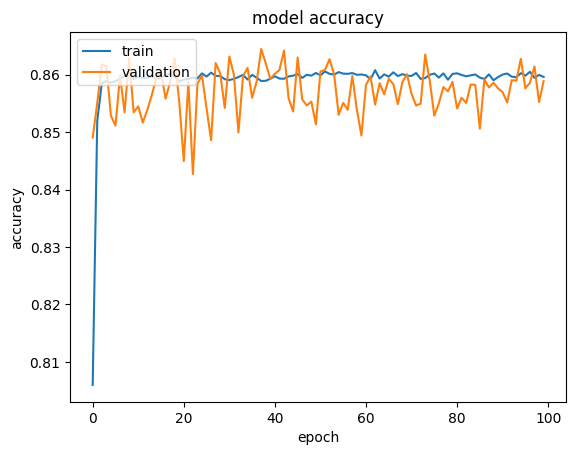

In [ ]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#teraz szukamy najbardziej optymalnej liczby batchy i epok
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
batch_size = [16, 32, 64]
epochs = [50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)

# search the grid
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    cv=3,
                    verbose=2)  # include n_jobs=-1 if you are using CPU

grid_result = grid.fit(X_train, y_train)

NameError: name 'KerasClassifier' is not defined

# Sieci Neuronowe Dzialajace

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop,Adam
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#early stop
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy',
                   mode='max',
                   patience=10,  #stop jak nie w 10 Epochs
                   restore_best_weights=True)

In [ ]:
NN_Classifier = model.fit(X_train, y_train,
                          batch_size=1000,
                          epochs=50,
                          callbacks =[es],
                          verbose=2,
                          validation_data=(X_test, y_test))

Epoch 1/50
68/68 - 6s - 91ms/step - accuracy: 0.8330 - loss: 0.3886 - val_accuracy: 0.8895 - val_loss: 0.2723
Epoch 2/50
68/68 - 3s - 43ms/step - accuracy: 0.9008 - loss: 0.2400 - val_accuracy: 0.9272 - val_loss: 0.1834
Epoch 3/50
68/68 - 5s - 75ms/step - accuracy: 0.9220 - loss: 0.1924 - val_accuracy: 0.9285 - val_loss: 0.1722
Epoch 4/50
68/68 - 5s - 67ms/step - accuracy: 0.9270 - loss: 0.1788 - val_accuracy: 0.9382 - val_loss: 0.1556
Epoch 5/50
68/68 - 3s - 39ms/step - accuracy: 0.9336 - loss: 0.1626 - val_accuracy: 0.9369 - val_loss: 0.1549
Epoch 6/50
68/68 - 5s - 74ms/step - accuracy: 0.9373 - loss: 0.1531 - val_accuracy: 0.9440 - val_loss: 0.1367
Epoch 7/50
68/68 - 3s - 43ms/step - accuracy: 0.9391 - loss: 0.1487 - val_accuracy: 0.9455 - val_loss: 0.1307
Epoch 8/50
68/68 - 5s - 77ms/step - accuracy: 0.9411 - loss: 0.1400 - val_accuracy: 0.9458 - val_loss: 0.1318
Epoch 9/50
68/68 - 5s - 73ms/step - accuracy: 0.9434 - loss: 0.1370 - val_accuracy: 0.9479 - val_loss: 0.1264
Epoch 10/5

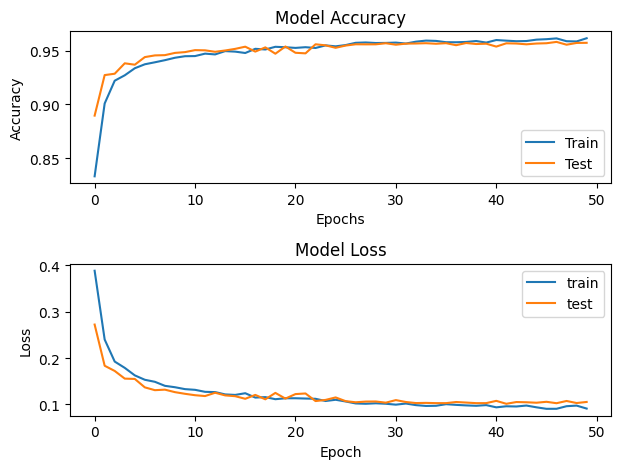

In [ ]:
%matplotlib inline
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(NN_Classifier.history['accuracy'])
plt.plot(NN_Classifier.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(NN_Classifier.history['loss'])
plt.plot(NN_Classifier.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

1032/1032 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step
Accuracy Score:  95.81%
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     18525
           1       0.97      0.94      0.95     14494

    accuracy                           0.96     33019
   macro avg       0.96      0.96      0.96     33019
weighted avg       0.96      0.96      0.96     33019



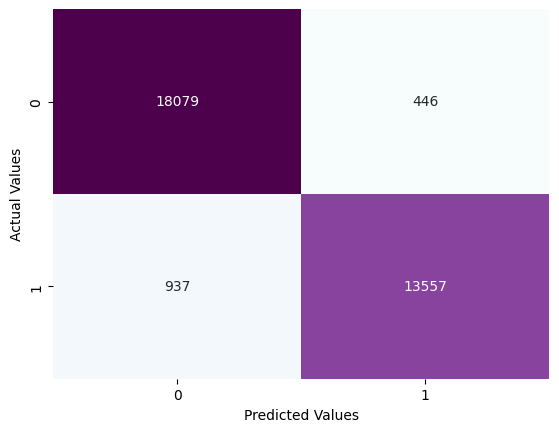

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred=(model.predict(X_test) > 0.5).astype(int)
print('Accuracy Score: ', '{:.2f}%'.format(accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# sieci dla istotnychcech

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_t_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
NN_Classifier = model.fit(X_t_train, y_train,
                          batch_size=1000,
                          epochs=200,
                          callbacks =[es],
                          verbose=2,
                          validation_data=(X_t_test, y_test))

Epoch 1/200
68/68 - 4s - 66ms/step - accuracy: 0.7688 - loss: 0.4939 - val_accuracy: 0.8515 - val_loss: 0.3542
Epoch 2/200
68/68 - 1s - 10ms/step - accuracy: 0.8695 - loss: 0.3203 - val_accuracy: 0.9068 - val_loss: 0.2336
Epoch 3/200
68/68 - 1s - 18ms/step - accuracy: 0.8993 - loss: 0.2494 - val_accuracy: 0.9204 - val_loss: 0.1974
Epoch 4/200
68/68 - 1s - 9ms/step - accuracy: 0.9067 - loss: 0.2285 - val_accuracy: 0.9263 - val_loss: 0.1835
Epoch 5/200
68/68 - 1s - 9ms/step - accuracy: 0.9130 - loss: 0.2134 - val_accuracy: 0.9280 - val_loss: 0.1807
Epoch 6/200
68/68 - 1s - 10ms/step - accuracy: 0.9173 - loss: 0.2027 - val_accuracy: 0.9306 - val_loss: 0.1722
Epoch 7/200
68/68 - 1s - 18ms/step - accuracy: 0.9190 - loss: 0.1978 - val_accuracy: 0.9190 - val_loss: 0.1942
Epoch 8/200
68/68 - 1s - 18ms/step - accuracy: 0.9208 - loss: 0.1923 - val_accuracy: 0.9325 - val_loss: 0.1666
Epoch 9/200
68/68 - 1s - 9ms/step - accuracy: 0.9229 - loss: 0.1876 - val_accuracy: 0.9343 - val_loss: 0.1617
Epoc

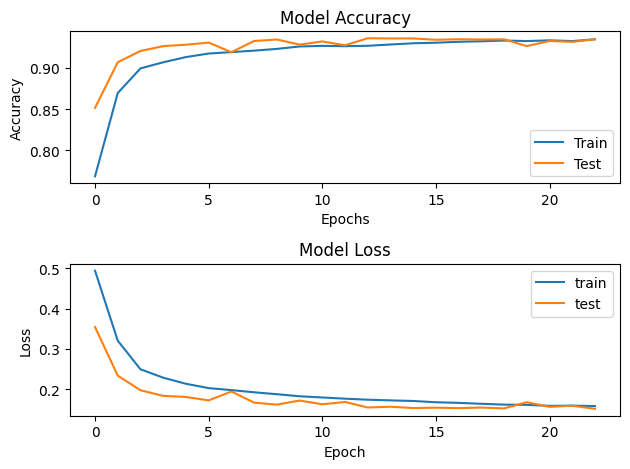

In [ ]:
%matplotlib inline
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(NN_Classifier.history['accuracy'])
plt.plot(NN_Classifier.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(NN_Classifier.history['loss'])
plt.plot(NN_Classifier.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

1032/1032 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy Score:  93.58%
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     18525
           1       0.95      0.90      0.92     14494

    accuracy                           0.94     33019
   macro avg       0.94      0.93      0.93     33019
weighted avg       0.94      0.94      0.94     33019



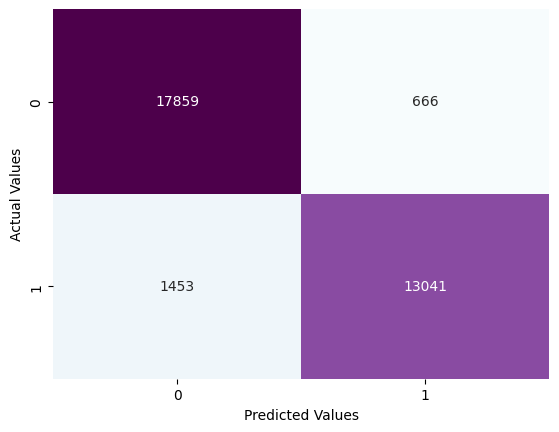

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred=(model.predict(X_t_test) > 0.5).astype(int)
print('Accuracy Score: ', '{:.2f}%'.format(accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()